### Умова завдання:

Знайти найменший по модулю вiд’ємний корiнь нелiнiйного рiвняння x^2 + 5 sin x − 1 = 0 методом релаксацiї, модифiкованним методом Ньютона та методом простої iтерацiї з точнiстю ε = 10^−4. Знайти апрiорну та апостерiорну оцiнку кiлькостi крокiв. Початковий промiжок та початкове наближення обрати однакове для обох методiв (якщо це можливо), порiвняти результати роботи методiв мiж собою.




In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для визначення непереревності функції
def continuity(f, a, b, epsilon=1e-4):
    if not callable(f):
        raise ValueError("The provided 'f' is not a callable function.")
    
    def limit(f, c, delta_x=1e-6):
        left_limit = f(c - delta_x)
        right_limit = f(c + delta_x)
        return left_limit, right_limit

    # Check if 'f' is defined at both 'a' and 'b'.
    if a <= b and (a is None or b is None):
        return False

    # Check the limits at 'a' and 'b'.
    left_limit_a, right_limit_a = limit(f, a)
    left_limit_b, right_limit_b = limit(f, b)

    # Check if the limits match the function value at 'a' and 'b'.
    if abs(left_limit_a - f(a)) > epsilon or abs(right_limit_a - f(a)) > epsilon or abs(left_limit_b - f(b)) > epsilon or abs(right_limit_b - f(b)) > epsilon:
        return False

    return True

# Функція для визначення знакосталості функції
def check_sign_changes(f, a, b, num_points=10000) -> bool:
    x_values = np.linspace(a, b, num_points)
    signs = [np.sign(f(x)) for x in x_values]

    sign_changes = False
    for i in range(1, len(signs)):
        if signs[i] != signs[i - 1]:
            sign_changes = True
            break
    
    return sign_changes


# Функція для визначення мінімуму та максимуму функції на інтервалі
def find_absolute_extrema(f, a, b, num_points=10000):
    x_values = np.linspace(a, b, num_points)
    y_values = [abs(f(x)) for x in x_values]

    absolute_max = max(y_values)
    absolute_min = min(y_values)

    return absolute_max, absolute_min

# Визначимо нашу функцію
def f(x):
    return x**2 + 5 * np.sin(x) - 1

# Визначимо похідну функції
def df(x):
    return 2 * x + 5 * np.cos(x)

# Визначимо похідну другого порядку функції
def d2f(x):
    return 2 - 5 * np.sin(x)

### Дослідження на розташування кореня:

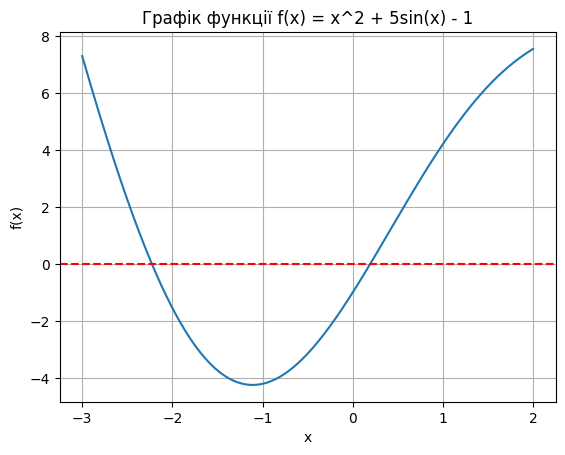

In [169]:
# Обчислення значень функції на проміжку [-3, 2]
x = np.linspace(-3, 2, 1000)
y = x**2 + 5 * np.sin(x) - 1

# Побудова графіку функції
plt.plot(x, y)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Графік функції f(x) = x^2 + 5sin(x) - 1')
plt.grid(True)
plt.show()


### Дослідження на наявність кореня на обраному проміжку:

In [170]:
def has_root(f, a, b) -> bool:
    if not callable(f):
        raise ValueError("f must be a callable function.")
    
    if a >= b:
        raise ValueError("The interval must satisfy 'a < b'.")
    
    fa = f(a)
    fb = f(b)
    
    if fa * fb < 0:
        return True
    else:
        return False


# Перевірка зміни знаків функції на кінцях проміжку [-2, 0]
a = -3
b = -2

if has_root(f, a, b):
    print("Зміна знаків функції на кінцях проміжку, корінь існує.")
else:
    print("Функція не має кореня на даному проміжку.")


Зміна знаків функції на кінцях проміжку, корінь існує.


### Метод релаксації

In [171]:
def relaxation_method(f, df, a, b, epsilon):
    x0 = (a + b) / 2  # Початкове наближення
    print("x0 =", x0)
    print("df(x0) =", df(x0))
    x = x0
    
    # Обчислення m1, M1, q, tao
    M1, m1 = find_absolute_extrema(df, a, b)
    print("m1 =", m1)
    print("M1 =", M1)
    q = (M1 - m1) / (M1 + m1)
    print("q =", q)
    tao = 2 / (M1 + m1)
    print("tao =", tao)

    # Перевірка достатньої умови збіжності
    if m1 <= 0 or m1 >= M1 or m1 >= np.abs(df(x)) or M1 <= np.abs(df(x)):
        print("Достатня умова збіжності не виконується.")
    else:
        print("Достатня умова збіжності виконується.")
    
    iterations = 0  # Лічильник ітерацій
    
    while True:
        if iterations > 100000:
            print("Перевищено максимальну кількість ітерацій.")
            return x, iterations

        x_next = x + tao * f(x)
        iterations += 1

        print("x_next =", x_next)
        
        if abs(x_next - x) < epsilon:
            return x_next, iterations
        
        
        x = x_next

# Виклик методу релаксації
root_relaxation, iterations_relaxation = relaxation_method(f, df, a, b, 1e-4)
print("Корінь методом релаксації:", root_relaxation)
print("Кількість ітерацій:", iterations_relaxation)


x0 = -2.5
df(x0) = -9.005718077734668
m1 = 6.080734182735712
M1 = 10.949962483002228
q = 0.2859089323141045
tao = 0.11743500804776619
Достатня умова збіжності виконується.
x_next = -2.2348741130452874
x_next = -2.228152750073394
x_next = -2.2273761259934495
x_next = -2.2272843553834414
Корінь методом релаксації: -2.2272843553834414
Кількість ітерацій: 4


## Метод простої ітерації

In [172]:
def simple_iteration_method(phi, dphi, a, b, epsilon):
    x0 = (a+b)/2  # Початкове наближення
    print("x0 =", x0)
    x = x0

    # Перевiримо достатнi умови збiжностi
    q, _ = find_absolute_extrema(dphi, a, b)
    print("q =", q)                                                             
    condition_2_left = abs(phi(x0) - x0)
    print("condition_2_left =", condition_2_left)
    delta = max(abs(a - x0), abs(b - x0))
    print("delta =", delta)
    condition_2_right = (1-q)*delta
    print("condition_2_right =", condition_2_right)

    # Перевірка достатньої умови збіжності
    if q >= 1 or condition_2_left >= condition_2_right:
        print("Достатня умова збіжності не виконується.")
    else:
        print("Достатня умова збіжності виконується.")

    iterations = 0  # Лічильник ітерацій
    
    while True:
        if iterations > 100000:
            print("Перевищено максимальну кількість ітерацій.")
            return x, iterations

        x_next = phi(x)
        iterations += 1

        print("x_next =", x_next)
        
        if abs(x_next - x) < epsilon:
            return x_next, iterations
        
        x = x_next

# Виразимо х з функції f(x) = 0
def phi(x):
    return (1-5*np.sin(x))/x

# Визначимо похідну функції
def dphi(x):
    return (-1 - 5 * x * np.cos(x) + 5 * np.sin(x)) / x**2

# Виклик методу простої ітерації
root_simple_iteration, iterations_simple_iteration = simple_iteration_method(phi, dphi, a, b, 1e-4)
print("Корінь методом простої ітерації:", root_simple_iteration)
print("Кількість ітерацій:", iterations_simple_iteration)


x0 = -2.5
q = 2.4269888748999584
condition_2_left = 0.9030557117920872
delta = 0.5
condition_2_right = -0.7134944374499792
Достатня умова збіжності не виконується.
x_next = -1.5969442882079128
x_next = -3.75610523921467
x_next = 0.501264371822868
x_next = -2.7982713466992064
x_next = -0.9588355775865454
x_next = -5.311250528097685
x_next = 0.5892942680133806
x_next = -3.018648596351505
x_next = -0.5344023317360749
x_next = -6.6366363974995854
x_next = -0.4114566373891535
x_next = -7.29049871350598
x_next = -0.7169604835314578
x_next = -5.977292496375147
x_next = 0.08460742078373121
x_next = 6.825257438258168
x_next = -0.23142875874982619
x_next = -9.276470804050186
x_next = -0.18744417571062105
x_next = -10.305693658728607
x_next = 0.2771875492353154
x_next = -1.3285524234226993
x_next = -4.4063076757117745
x_next = 0.8550488777061728
x_next = -3.2431069389656217
x_next = -0.15210719225635333
x_next = -11.555052877647482
x_next = 0.28019428748518976
x_next = -1.3658801733303936
x_next 

In [173]:
def phi2(x):
    return np.sqrt(1 - 5 * np.sin(x))

# Визначимо похідну функції
def dphi2(x):
    return -(5 * np.cos(x))/(2 * np.sqrt(1 - 5 * np.sin(x)))

root_simple_iteration, iterations_simple_iteration = simple_iteration_method(phi2, dphi2, a, b, 1e-4)
print("Корінь методом простої ітерації:", root_simple_iteration)
print("Кількість ітерацій:", iterations_simple_iteration)

x0 = -2.5
q = 1.8951051544919841
condition_2_left = 4.4980892674051836
delta = 0.5
condition_2_right = -0.44755257724599207
Достатня умова збіжності не виконується.
x_next = 1.9980892674051833
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19036\540089556.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - 5 * np.sin(x))


nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next = nan
x_next =

## Метод модифікованого Ньютона


In [174]:
def modified_newton_method(f, df, ddf, a, b, epsilon):
    x0 = (a + b) / 2  # Початкове наближення
    x = x0

    continuity_df = continuity(df, a, b)
    print("Неперервна похідна:", continuity_df)
    continuity_ddf = continuity(ddf, a, b)
    print("Неперервна друга похідна:", continuity_ddf)
    sign_changes_df = check_sign_changes(df, a, b)
    print("Зміна знаку похідної:", sign_changes_df)
    sign_changes_ddf = check_sign_changes(ddf, a, b)
    print("Зміна знаку другої похідної:", sign_changes_ddf)
    has_root_df = has_root(df, a, b)
    print("Наявність кореня в похідної на проміжку [a;b]:", has_root_df)

    # Перевірка достатньої умови збіжності
    if continuity_ddf and not sign_changes_df and not sign_changes_ddf and not has_root_df:
        print("Достатня умова збіжності виконується.")
    else:
        print("Достатня умова збіжності не виконується.")

    iterations = 0  # Лічильник ітерацій
    
    while True:
        x_next = x - f(x) / df(x0)
        iterations += 1

        print("x_next =", x_next)
        
        if abs(x_next - x) < epsilon:
            return x_next, iterations
        
        x = x_next

root_modified_newton, iterations_modified_newton = modified_newton_method(f, df, d2f, a, b, 1e-4)
print("Корінь модифікованим методом Ньютона:", root_modified_newton)
print("Кількість ітерацій:", iterations_modified_newton)

Неперервна похідна: True
Неперервна друга похідна: True
Зміна знаку похідної: False
Зміна знаку другої похідної: False
Наявність кореня в похідної на проміжку [a;b]: False
Достатня умова збіжності виконується.
x_next = -2.2493104647521776
x_next = -2.2307814849732552
x_next = -2.2278523040278606
x_next = -2.2273685322844647
x_next = -2.227288088464884
Корінь модифікованим методом Ньютона: -2.227288088464884
Кількість ітерацій: 5
